<a href="https://colab.research.google.com/github/hilaaml/uasbdl/blob/main/BDL_UAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : SAHILA AMALIA**

 **NIM : 23.11.5678**

 ---

 **UAS BIG DATA LANJUT 2026**

1. Ambil sebuah studi kasus tertentu dengan dataset primer / sekunder dengan syarat memenuhi minimal 3 dari kategori Big Data 5V, boleh data terstruktur maupun tidak terstruktur. (SCPMK 1534104, SCPMK 1534001)

2. Gunakan file system HDFS (Hadoop file system) maupun file system lain untuk menyimpan dataset yang anda gunakan (SCPMK 1534103)

3. Lakukan pemrosesan data menggunakan PySpark sesuai dengan pipeline bigdata diantaranya :

    a. Gunakan pemrosesan batch dengan menggunakan mapreduce (SCPMK 1532206)

    b. Gunakan EDA (exploratory data analysis) untuk menganalisa data yang anda miliki, visualisasikan data yang anda miliki! (SCPMK 1534103)

    c. Untuk menjamin kualitas data gunakan Preprosesing data: casting tipe, handling missing value, dll. (SCPMK 1534104)

    d. Gunakan manipulasi data seperti query spark (Spark SQL, CTE, sub query, sql hint, dll), agregasi nilai (SCPMK 1534104)
    
    e. Lakukan operasi partisi menggunakan RDD seperti map, flatmap, partitioner, byKey (reducebykey, groupbykey, combinebykey/aggregatebykey) (SCPMK 1532205)

4. Dari data yang telah bersih lakukan permodelan algoritma berbasis ML framework (MLLib) sesuai dengan tugas dataset yang anda miliki (supervised / unsupervised), komparasi minimal 2 algoritma sesuai dengan tugas project anda (SCPMK 1534007, SCPMK 1534008, SCPMK 1534109, SCPMK 1534110)

5. Lakukan hyperparameter tuning terhadap best model dari soal ke 4. Interpretasikan hasil yang ada dengan baik (SCPMK 1534114).

6. Gunakan evaluasi model yang anda telah buat seperti (RMSE, MSE, Akurasi, presisi, recall, F1-Score, AUC, Silhoutte, dsbnya sesuai dengan tujuan project) (SCPMK 1534113)


 ---

**DATASET**

[eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop) berisikan log  aktivitas pengguna (User Behavior) dari toko kosmetik online selama 5 bulan (Oktober 2019 - Februari 2020).

**LAUNCHINPAD**

Tautan : https://launchinpad.amikom.ac.id/project/analisis-perilaku-konsumen-dan-klasifikasi-purchase-interaction-pada-platform-e-commerce-kosmetik-menggunakan-ekosistem-pyspark-e71848f/

**STUDI KASUS**

Product Recommendation System & Customer Behavior Analysis

Dataset ini memenuhi karakteristik Big Data:
1. Volume: 42+ juta records dari event tracking
2. Velocity: Real-time event streaming dari user interactions
3. Variety: Multiple event types (view, cart, purchase) dengan nested data
4. Veracity: Data mentah dengan missing values dan inconsistencies
5. Value: Insights untuk business decisions (recommendations, marketing)

Menganalisis perilaku customer untuk:
- Memprediksi kemungkinan purchase dari user behavior
- Clustering customer segments
- Product recommendation optimization

## 1. Environment Setup

In [1]:
# Konfigurasi Kaggle

import os
from google.colab import userdata

# Mengambil Secrets Google Colab
try:
    kaggle_user = userdata.get('KAGGLE_USERNAME')
    kaggle_key = userdata.get('KAGGLE_KEY')

    # Set sebagai Environment Variable
    os.environ['KAGGLE_USERNAME'] = kaggle_user
    os.environ['KAGGLE_KEY'] = kaggle_key

    print("Berhasil memuat kredensial Kaggle")

except Exception as e:
    print(f"Error: {e}")

Berhasil memuat kredensial Kaggle


In [2]:
import os

zip_file = "ecommerce-events-history-in-cosmetics-shop.zip"
expected_csv = "2019-Oct.csv"

# 1. Cek & Download Dataset
if not os.path.exists(zip_file) and not os.path.exists(expected_csv):
    print("Dataset tidak ditemukan. Mendownload dari Kaggle...")
    !kaggle datasets download -d mkechinov/ecommerce-events-history-in-cosmetics-shop
else:
    print("File dataset sudah ada (Zip atau CSV). Lewati download.")

# 2. Cek & Unzip
if os.path.exists(zip_file):
    if not os.path.exists(expected_csv):
        print("Mengekstrak file...")
        !unzip -o {zip_file}
    else:
        print("File sudah diekstrak sebelumnya.")
else:
    print("Tidak ada file zip untuk diekstrak.")

# 3. Cek File Akhir
print("\nIsi direktori saat ini:")
!ls -lh --group-directories-first

File dataset sudah ada (Zip atau CSV). Lewati download.
File sudah diekstrak sebelumnya.

Isi direktori saat ini:
total 2.7G
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data
-rw-r--r-- 1 root root 397M Mar 16  2020 2019-Dec.csv
-rw-r--r-- 1 root root 521M Mar 16  2020 2019-Nov.csv
-rw-r--r-- 1 root root 461M Mar 16  2020 2019-Oct.csv
-rw-r--r-- 1 root root 467M Mar 16  2020 2020-Feb.csv
-rw-r--r-- 1 root root 479M Mar 16  2020 2020-Jan.csv
-rw-r--r-- 1 root root 430M Mar 16  2020 ecommerce-events-history-in-cosmetics-shop.zip


In [3]:
# Install PySpark

!pip uninstall -y pyspark -q
!pip install pyspark==3.5.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 1.0.1 requires pyspark[connect]~=4.0.0, but you have pyspark 3.5.1 which is incompatible.


In [4]:
# Install Java

!apt-get update -qq
!apt-get install -y openjdk-11-jdk-headless -qq

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

!java -version

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
openjdk version "11.0.29" 2025-10-21
OpenJDK Runtime Environment (build 11.0.29+7-post-Ubuntu-1ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.29+7-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)


In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ECommerce-BigData-Analysis") \
    .master("local[*]") \
    .config("spark.driver.memory", "1g") \
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

print("Spark Version:", spark.version)

Spark Version: 3.5.1


## 2. HDFS File System (SCPMK 1534103)

In [6]:
HDFS_PATH = "/tmp/hdfs/ecommerce/"

!mkdir -p {HDFS_PATH}raw
!mkdir -p {HDFS_PATH}processed
!mkdir -p {HDFS_PATH}models
!cp 2019-Oct.csv {HDFS_PATH}raw/

print("HDFS structure created")
!find {HDFS_PATH} -type d

HDFS structure created
/tmp/hdfs/ecommerce/
/tmp/hdfs/ecommerce/models
/tmp/hdfs/ecommerce/processed
/tmp/hdfs/ecommerce/raw


In [7]:
# Load HDFS
df_raw = spark.read.csv(f"{HDFS_PATH}raw/2019-Oct.csv", header=True, inferSchema=True)
print(f"Loaded {df_raw.count():,} records")
print(f"Partisi: {df_raw.rdd.getNumPartitions()}")

Loaded 4,102,283 records
Partisi: 4


## 3. Big Data 5V

In [8]:
df_raw.printSchema()
df_raw.show(5, truncate=False)

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)

+-------------------+----------+----------+-------------------+-------------+------+-----+---------+------------------------------------+
|event_time         |event_type|product_id|category_id        |category_code|brand |price|user_id  |user_session                        |
+-------------------+----------+----------+-------------------+-------------+------+-----+---------+------------------------------------+
|2019-10-01 00:00:00|cart      |5773203   |1487580005134238553|NULL         |runail|2.62 |463240011|26dd6e6e-4dac-4778-8d2c-92e149dab885|
|2019-10-01 00:00:03|cart      |5773353   |1487580005134238553|NULL 

In [9]:
from pyspark.sql.functions import countDistinct, col

total = df_raw.count()
print(f"\n1. VOLUME: {total:,} events")

print("\n2. VELOCITY: aliran data")
df_raw.select("event_time").show(3, truncate=False)

print("\n3. VARIETY:")
df_raw.groupBy("event_type").count().orderBy(col("count").desc()).show()

print("\n4. VERACITY (nilai nuls):")
from pyspark.sql.functions import count as spark_count, when
df_raw.select([spark_count(when(col(c).isNull(), c)).alias(c) for c in df_raw.columns]).show()

print("\n5. VALUE: Analisis perilaku customer.")


1. VOLUME: 4,102,283 events

2. VELOCITY: aliran data
+-------------------+
|event_time         |
+-------------------+
|2019-10-01 00:00:00|
|2019-10-01 00:00:03|
|2019-10-01 00:00:07|
+-------------------+
only showing top 3 rows


3. VARIETY:
+----------------+-------+
|      event_type|  count|
+----------------+-------+
|            view|1862164|
|            cart|1232385|
|remove_from_cart| 762110|
|        purchase| 245624|
+----------------+-------+


4. VERACITY (nilai nuls):
+----------+----------+----------+-----------+-------------+-------+-----+-------+------------+
|event_time|event_type|product_id|category_id|category_code|  brand|price|user_id|user_session|
+----------+----------+----------+-----------+-------------+-------+-----+-------+------------+
|         0|         0|         0|          0|      4034806|1659261|    0|      0|         637|
+----------+----------+----------+-----------+-------------+-------+-----+-------+------------+


5. VALUE: Analisis perilaku

## 4. MapReduce Batch Processing (SCPMK 1532206)

In [10]:
# MapReduce 1: Event Type Distribution
rdd_events = df_raw.rdd

event_counts = rdd_events \
    .map(lambda r: (r['event_type'], 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False)

print("Jumlah Event (MapReduce):")
for event, count in event_counts.collect():
    print(f"  {event:20s}: {count:,}")

Jumlah Event (MapReduce):
  view                : 1,862,164
  cart                : 1,232,385
  remove_from_cart    : 762,110
  purchase            : 245,624


Perhitungan MapReduce menunjukkan pelanggan cenderung melihat dan memasukkan kosmetik ke keranjang. Ditandai dengan nilai keduanya yg berdekatan.

In [11]:
# MapReduce 2: Top Products
top_products = rdd_events \
    .filter(lambda r: r['event_type'] == 'view') \
    .map(lambda r: ((r['product_id'], r['brand']), 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

print("\nProduk Dilihat 10 Teratas:")
for i, ((pid, brand), cnt) in enumerate(top_products, 1):
    print(f"  {i}. Product {pid} ({brand or 'Unknown'}): {cnt:,}")


Produk Dilihat 10 Teratas:
  1. Product 5892179 (Unknown): 9,013
  2. Product 5809910 (grattol): 8,473
  3. Product 5877454 (jessnail): 6,597
  4. Product 5886282 (Unknown): 4,989
  5. Product 5809912 (grattol): 4,936
  6. Product 5877456 (jessnail): 4,816
  7. Product 5751383 (uno): 4,715
  8. Product 5856186 (runail): 4,547
  9. Product 5649236 (concept): 4,231
  10. Product 5809911 (grattol): 4,220


Produk yang paling dilihat adalah produk dengan merk tidak diketahui, diikuti grattol kemudian jessnail.

In [12]:
# MapReduce 3: Revenue by Brand
revenue_by_brand = rdd_events \
    .filter(lambda r: r['event_type'] == 'purchase' and r['brand']) \
    .map(lambda r: (r['brand'], float(r['price']) if r['price'] else 0.0)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: x[1], ascending=False) \
    .take(10)

print("\nMerk 10 Teratas dari Keuntungan:")
for i, (brand, revenue) in enumerate(revenue_by_brand, 1):
    print(f"  {i}. {brand:25s}: ${revenue:,.2f}")


Merk 10 Teratas dari Keuntungan:
  1. runail                   : $71,539.28
  2. irisk                    : $45,591.96
  3. grattol                  : $35,445.54
  4. uno                      : $35,302.03
  5. masura                   : $31,266.08
  6. cnd                      : $30,074.18
  7. strong                   : $29,196.63
  8. jessnail                 : $26,287.84
  9. ingarden                 : $23,161.39
  10. italwax                  : $21,940.24


Total merk yang meraup keuntungan paling tinggi adalah produk runail, diikuti irisk dan grattol.

## 5. Exploratory Data Analysis (SCPMK 1534103)

In [13]:
!pip install plotly matplotlib seaborn -q

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [14]:
from pyspark.sql.functions import count, countDistinct, avg, min, max

stats = df_raw.select(
    count("*").alias("total"),
    countDistinct("user_id").alias("users"),
    countDistinct("product_id").alias("products"),
    countDistinct("brand").alias("brands"),
    avg("price").alias("avg_price"),
    min("price").alias("min_price"),
    max("price").alias("max_price")
).toPandas()

print(stats.T)

                      0
total      4.102283e+06
users      3.996640e+05
products   4.189900e+04
brands     2.400000e+02
avg_price  8.534920e+00
min_price -7.937000e+01
max_price  3.076000e+02


Dapat dilihat dataset sangat padat, yaitu dengan total lebih dari 4.1 juta interaksi yang melibatkan 400 ribu pelanggan unik dengan hampir 42 ribu produk.

In [15]:
# Visualization 1: Event Distribution
event_dist = df_raw.groupBy("event_type").count().toPandas()

fig = px.pie(event_dist, values='count', names='event_type',
             title='Distribusi Jenis Event')
fig.show()

Event pelanggan yang melihat lihat produk mendominasi diikuti pelanggan yang memasukkan ke keranjang dan menghapusd ari keranjang.

In [16]:
# Visualization 2: Top Categories
top_cat = df_raw.filter(col("category_code").isNotNull()) \
    .groupBy("category_code").count() \
    .orderBy(col("count").desc()).limit(15).toPandas()

fig = px.bar(top_cat, x='count', y='category_code', orientation='h',
             title='Top 15 Kategori')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

Barang dengan jumlah tertinggi ada di kategori vacuum, cartridge dan sarung tangan. Cukup kontradiktif mengetahui dataset ini merupakan ecommerce kosmetik.

In [17]:
# Visualization 3: Conversion Funnel
import plotly.graph_objects as go

funnel = df_raw.groupBy("event_type") \
    .agg(countDistinct("user_id").alias("users")).toPandas()

order = {'view': 1, 'cart': 2, 'purchase': 3}
funnel['order'] = funnel['event_type'].map(order)
funnel = funnel.sort_values('order')

fig = go.Figure(go.Funnel(
    y=funnel['event_type'],
    x=funnel['users'],
    textinfo="value+percent initial"
))
fig.update_layout(title='Conversion Funnel')
fig.show()

Retensi Tahap Awal (View to Cart): Dari 388.331 views, sebanyak 34% (133.818) berlanjut ke keranjang. Angka 34% ini tergolong high intent, menunjukkan bahwa produk yang ditampilkan sangat relevan dengan kebutuhan pengunjung.

Konversi Akhir (Purchase): Konversi akhir berada di angka 7% (25.762 transaksi) dari total views. Meskipun terlihat kecil, angka 7% sebenarnya cukup baik untuk e-commerce (standar industri seringkali 2-3%).

Perilaku Penghapusan (Remove): Angka remove_from_cart (47.09k) hampir dua kali lipat lebih besar dari jumlah purchase (25.762k). Ini menandakan banyak pengguna yang "ragu-ragu" atau menggunakan keranjang sebagai alat kalkulasi harga total sebelum memutuskan untuk membatalkan sebagian item.

## 6. Data Preprocessing (SCPMK 1534104)

In [18]:
from pyspark.sql.functions import (
    col, to_timestamp, hour, dayofweek, split, size
)
from pyspark.sql.types import DoubleType, IntegerType

# Type Casting
df_clean = df_raw \
    .withColumn("event_time", to_timestamp("event_time")) \
    .withColumn("product_id", col("product_id").cast(IntegerType())) \
    .withColumn("price", col("price").cast(DoubleType())) \
    .withColumn("user_id", col("user_id").cast(IntegerType()))

print("Type casting done")
df_clean.printSchema()

Type casting done
root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [19]:
# Handle Missing Values
df_clean = df_clean.fillna({'brand': 'Unknown', 'category_code': 'uncategorized'})
df_clean = df_clean.filter(col("price").isNotNull() & (col("price") > 0))
df_clean = df_clean.filter(col("user_session").isNotNull())

print(f"After cleaning: {df_clean.count():,}")

After cleaning: 4,095,560


In [20]:
# Outlier Removal
Q1, Q3 = df_clean.approxQuantile("price", [0.25, 0.75], 0.01)
IQR = Q3 - Q1
lower = __builtins__.max(0, Q1 - 3*IQR)
upper = Q3 + 3*IQR

df_clean = df_clean.filter((col("price") >= lower) & (col("price") <= upper))
print(f"After outlier removal: {df_clean.count():,}")

After outlier removal: 3,839,940


In [21]:
# Feature Engineering
df_clean = df_clean \
    .withColumn("hour_of_day", hour("event_time")) \
    .withColumn("day_of_week", dayofweek("event_time")) \
    .withColumn("category_depth", size(split(col("category_code"), "\\.")))

print("Features created")
df_clean.select("hour_of_day", "day_of_week", "category_depth").show(5)

Features created
+-----------+-----------+--------------+
|hour_of_day|day_of_week|category_depth|
+-----------+-----------+--------------+
|          0|          3|             1|
|          0|          3|             1|
|          0|          3|             1|
|          0|          3|             1|
|          0|          3|             1|
+-----------+-----------+--------------+
only showing top 5 rows



In [22]:
# Simpan ke HDFS
df_clean.write.mode("overwrite").parquet(f"{HDFS_PATH}processed/cleaned.parquet")
print("Saved to HDFS")

Saved to HDFS


## 7. Spark SQL Queries (SCPMK 1534104)

In [23]:
df_clean.createOrReplaceTempView("events")

# CTE Query
query1 = """
WITH user_activity AS (
    SELECT user_id,
           COUNT(*) as total_events,
           SUM(CASE WHEN event_type = 'view' THEN 1 ELSE 0 END) as views,
           SUM(CASE WHEN event_type = 'purchase' THEN 1 ELSE 0 END) as purchases,
           SUM(CASE WHEN event_type = 'purchase' THEN price ELSE 0 END) as revenue
    FROM events
    GROUP BY user_id
)
SELECT user_id, total_events, views, purchases, revenue,
       ROUND(purchases*100.0/NULLIF(views,0), 2) as conversion_rate
FROM user_activity
WHERE purchases > 0
ORDER BY revenue DESC
LIMIT 20
"""

spark.sql(query1).show()

+---------+------------+-----+---------+------------------+---------------+
|  user_id|total_events|views|purchases|           revenue|conversion_rate|
+---------+------------+-----+---------+------------------+---------------+
|549368055|         394|   27|      207| 880.8600000000008|         766.67|
|150318419|         600|  249|       87| 728.8899999999999|          34.94|
|546827800|        1371|    7|      325| 717.9500000000005|        4642.86|
|499085268|         494|   29|      146| 717.1500000000001|         503.45|
|522130011|         246|    7|      117| 683.0699999999997|        1671.43|
|560168040|         284|    1|      127|            641.22|       12700.00|
|549195612|         426|   50|      127| 619.8700000000002|         254.00|
|552552564|         251|   14|      120| 580.5000000000003|         857.14|
|414081754|         235|    5|       83| 542.2099999999998|        1660.00|
|561592095|         654|   64|       90| 530.6600000000001|         140.63|
|539691934| 

Analisis : platform kemungkinan didominasi oleh perilaku B2B (Business-to-Business) atau pembeli grosir (pemilik salon), bukan pembeli eceran biasa. Terlihat dari rasio Views terhadap Purchases yang sangat anomali. Sebagai contoh ekstrem, pengguna dengan ID 560168040 mencatatkan 12.700% Conversion Rate (1 View berbanding 127 Purchases). Secara logis, ini menunjukkan bahwa pengguna tersebut tidak menjelajahi halaman detail produk satu per satu, melainkan kemungkinan besar melakukan pemesanan massal (bulk order) langsung dari halaman katalog, fitur reorder, atau memanipulasi keranjang belanja secara intensif. Pola ini konsisten dengan temuan sebelumnya mengenai kategori "Vacuum" dan "Gloves". Pengguna ini mengisi stok operasional mereka, bukan berbelanja.

In [24]:
# Subquery
query2 = """
SELECT product_id, brand, total_views, total_purchases, total_revenue,
       ROUND(total_purchases*100.0/total_views, 2) as conversion_rate
FROM (
    SELECT product_id, MAX(brand) as brand,
           COUNT(CASE WHEN event_type='view' THEN 1 END) as total_views,
           COUNT(CASE WHEN event_type='purchase' THEN 1 END) as total_purchases,
           SUM(CASE WHEN event_type='purchase' THEN price ELSE 0 END) as total_revenue
    FROM events
    GROUP BY product_id
    HAVING COUNT(CASE WHEN event_type='view' THEN 1 END) > 100
) p
WHERE total_purchases > 0
ORDER BY total_revenue DESC
LIMIT 20
"""

spark.sql(query2).show()

+----------+-------+-----------+---------------+------------------+---------------+
|product_id|  brand|total_views|total_purchases|     total_revenue|conversion_rate|
+----------+-------+-----------+---------------+------------------+---------------+
|   5751422|    uno|       4094|            644| 7051.800000000019|          15.73|
|   5792800|Unknown|       3405|            592| 6109.439999999995|          17.39|
|   5751383|    uno|       4715|            566| 5841.119999999997|          12.00|
|   5849033|    uno|       3466|            440| 4540.800000000003|          12.69|
|   5528035|Unknown|       2394|            401| 3817.519999999995|          16.75|
|   5892179|Unknown|       9011|            202|3815.7800000000034|           2.24|
|   5822650|Unknown|        386|            152| 2895.599999999997|          39.38|
|   5651975|Unknown|       1600|            175|2833.2500000000027|          10.94|
|   5724230|Unknown|        700|            130|            2372.5|         

Pasar didominasi brand uno. dengan produk dengan pendapatan paling tinggi.

## 8. RDD Operations (SCPMK 1532205)

In [25]:
rdd_clean = df_clean.rdd.repartition(100)
print(f"Partitions: {rdd_clean.getNumPartitions()}")

Partitions: 100


In [26]:
# map()
user_product = rdd_clean.map(
    lambda r: (r['user_id'], (r['product_id'], r['event_type'], r['price']))
)
print("Map sample:")
for pair in user_product.take(3):
    print(f"  User {pair[0]}: {pair[1]}")

Map sample:
  User 555449996: (5835352, 'view', 5.54)
  User 555449997: (5836549, 'view', 3.02)
  User 555449998: (5752752, 'view', 3.17)


Data mentah dipetakan menjadi pasangan key-value sebagai persiapan agregasi.

In [27]:
# flatMap()
tokens = rdd_clean \
    .filter(lambda r: r['category_code'] != 'uncategorized') \
    .flatMap(lambda r: [(t, 1) for t in r['category_code'].split('.')]) \
    .reduceByKey(lambda a,b: a+b) \
    .sortBy(lambda x: x[1], ascending=False)

print("Top tokens:")
for token, cnt in tokens.take(10):
    print(f"  {token}: {cnt:,}")

Top tokens:
  cartrige: 13,445
  stationery: 13,445
  apparel: 7,353
  glove: 7,353
  appliances: 4,887
  environment: 4,887
  vacuum: 4,731
  bath: 3,206
  bathroom: 3,206
  furniture: 3,206


Tokenisasi teks pada categori tersebut menunjukkan adanya jumlah kategori yang saling identik sehingga akan mudah dilakukan pengelompokan.

In [28]:
# reduceByKey()
user_spending = rdd_clean \
    .filter(lambda r: r['event_type'] == 'purchase') \
    .map(lambda r: (r['user_id'], r['price'])) \
    .reduceByKey(lambda a,b: a+b) \
    .sortBy(lambda x: x[1], ascending=False)

print("Top spenders:")
for uid, spent in user_spending.take(10):
    print(f"  User {uid}: ${spent:,.2f}")

Top spenders:
  User 549368055: $880.86
  User 150318419: $728.89
  User 546827800: $717.95
  User 499085268: $717.15
  User 522130011: $683.07
  User 560168040: $641.22
  User 549195612: $619.87
  User 552552564: $580.50
  User 414081754: $542.21
  User 561592095: $530.66


In [29]:
# groupByKey()
user_events = rdd_clean \
    .map(lambda r: (r['user_id'], r['event_type'])) \
    .groupByKey() \
    .mapValues(list)

print("User event sequences:")
for uid, events in user_events.take(5):
    print(f"  User {uid}: {len(events)} events - {events[:5]}")

User event sequences:
  User 333709300: 115 events - ['view', 'view', 'view', 'view', 'cart']
  User 400087800: 98 events - ['view', 'remove_from_cart', 'remove_from_cart', 'remove_from_cart', 'view']
  User 550989800: 605 events - ['remove_from_cart', 'view', 'cart', 'view', 'view']
  User 480282100: 162 events - ['view', 'cart', 'cart', 'view', 'view']
  User 541475200: 268 events - ['cart', 'remove_from_cart', 'cart', 'cart', 'view']


In [30]:
# aggregateByKey()
def seq_func(acc, r):
    events = acc[0] + 1
    spent = acc[1] + (r['price'] if r['event_type'] == 'purchase' else 0)
    products = acc[2] | {r['product_id']}
    return (events, spent, products)

def comb_func(a1, a2):
    return (a1[0]+a2[0], a1[1]+a2[1], a1[2]|a2[2])

user_stats = rdd_clean \
    .map(lambda r: (r['user_id'], r)) \
    .aggregateByKey((0, 0.0, set()), seq_func, comb_func) \
    .map(lambda x: (x[0], x[1][0], x[1][1], len(x[1][2]))) \
    .sortBy(lambda x: x[2], ascending=False)

print("User stats (events, spent, products):")
for uid, events, spent, prods in user_stats.take(10):
    print(f"  User {uid}: {events} events, ${spent:.2f}, {prods} products")

User stats (events, spent, products):
  User 549368055: 394 events, $880.86, 269 products
  User 150318419: 600 events, $728.89, 321 products
  User 546827800: 1371 events, $717.95, 365 products
  User 499085268: 494 events, $717.15, 214 products
  User 522130011: 246 events, $683.07, 123 products
  User 560168040: 284 events, $641.22, 130 products
  User 549195612: 426 events, $619.87, 171 products
  User 552552564: 251 events, $580.50, 175 products
  User 414081754: 235 events, $542.21, 112 products
  User 561592095: 654 events, $530.66, 221 products


In [31]:
# combineByKey()
def create_comb(price):
    return (price, 1)

def merge_val(acc, price):
    return (acc[0]+price, acc[1]+1)

def merge_comb(a1, a2):
    return (a1[0]+a2[0], a1[1]+a2[1])

brand_avg = rdd_clean \
    .filter(lambda r: r['brand']!='Unknown' and r['event_type']=='purchase') \
    .map(lambda r: (r['brand'], r['price'])) \
    .combineByKey(create_comb, merge_val, merge_comb) \
    .mapValues(lambda x: x[0]/x[1]) \
    .sortBy(lambda x: x[1], ascending=False)

print("Brand avg price:")
for brand, avg in brand_avg.take(10):
    print(f"  {brand}: ${avg:.2f}")

Brand avg price:
  keune: $21.00
  bosnic: $20.94
  sunuv: $20.63
  beautyblender: $18.89
  kosmekka: $17.87
  ypsed: $17.79
  labay: $17.69
  osmo: $17.55
  lowence: $17.46
  coxir: $17.39


Dapat dilihat brand dengan rata rata harga yang cukup tinggi, dapat juga disebut brand yang pricy atau mungkin premium.

## 9. ML Feature Preparation

In [32]:
# User Feature Engineering
user_features = spark.sql("""
    SELECT user_id,
           COUNT(*) as total_events,
           COUNT(DISTINCT user_session) as session_count,
           COUNT(DISTINCT product_id) as unique_products,
           SUM(CASE WHEN event_type='view' THEN 1 ELSE 0 END) as view_count,
           SUM(CASE WHEN event_type='cart' THEN 1 ELSE 0 END) as cart_count,
           SUM(CASE WHEN event_type='purchase' THEN 1 ELSE 0 END) as purchase_count,
           AVG(price) as avg_price,
           MAX(price) as max_price,
           SUM(CASE WHEN event_type='purchase' THEN price ELSE 0 END) as total_spent,
           AVG(hour_of_day) as avg_hour,
           COUNT(DISTINCT brand) as unique_brands
    FROM events
    GROUP BY user_id
    HAVING COUNT(*) >= 3
""")

user_features = user_features \
    .withColumn("view_cart_ratio", col("cart_count")/(col("view_count")+1)) \
    .withColumn("cart_purchase_ratio", col("purchase_count")/(col("cart_count")+1)) \
    .withColumn("purchase_rate", col("purchase_count")/col("total_events")) \
    .withColumn("avg_order_value", col("total_spent")/(col("purchase_count")+1)) \
    .withColumn("is_buyer", (col("purchase_count") > 0).cast("integer"))

print(f"Features: {user_features.count():,} users")
user_features.show(5)

Features: 165,026 users
+---------+------------+-------------+---------------+----------+----------+--------------+-----------------+---------+------------------+-----------------+-------------+-------------------+-------------------+-------------------+-----------------+--------+
|  user_id|total_events|session_count|unique_products|view_count|cart_count|purchase_count|        avg_price|max_price|       total_spent|         avg_hour|unique_brands|    view_cart_ratio|cart_purchase_ratio|      purchase_rate|  avg_order_value|is_buyer|
+---------+------------+-------------+---------------+----------+----------+--------------+-----------------+---------+------------------+-----------------+-------------+-------------------+-------------------+-------------------+-----------------+--------+
| 43713532|         131|            2|             61|         2|        70|            56|3.958167938931296|     20.0|228.10000000000005|18.34351145038168|           13| 23.333333333333332| 0.788732394

Tabel fitur berhasil menangkap perilaku pelanggan. User paling atas menunjukkan dengan hanya melakukan 2 views tapi memiliki 56 purchases dengan total belanja hingga 228 dollar. Menunjukkan pelanggan yg melakukan bulk buying dibandingkan perilaku window shopping.

## 10. Classification Models (SCPMK 1534007, 1534008)

In [33]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

feature_cols = [
    'total_events', 'session_count', 'unique_products',
    'view_count', 'cart_count', 'avg_price', 'max_price',
    'avg_hour', 'unique_brands', 'view_cart_ratio', 'cart_purchase_ratio'
]

ml_data = user_features.select(feature_cols + ['is_buyer']).na.fill(0)
train, test = ml_data.randomSplit([0.8, 0.2], seed=42)

print(f"Train: {train.count():,}, Test: {test.count():,}")
ml_data.groupBy('is_buyer').count().show()

Train: 131,966, Test: 33,060
+--------+------+
|is_buyer| count|
+--------+------+
|       1| 24724|
|       0|140302|
+--------+------+



Pada distribusi target variabel is_buyer terdapat imbalance data dimana hanya sekitar 15% adalah pembeli sendangkan 85% adalah bukan pembeli.

In [34]:
# Preprocessing
assembler = VectorAssembler(inputCols=feature_cols, outputCol="raw_features")
scaler = StandardScaler(inputCol="raw_features", outputCol="features",
                        withStd=True, withMean=True)

In [35]:
# Model 1: Random Forest
rf = RandomForestClassifier(labelCol="is_buyer", featuresCol="features",
                             numTrees=100, maxDepth=10, seed=42)
rf_pipeline = Pipeline(stages=[assembler, scaler, rf])

print("Training Random Forest...")
rf_model = rf_pipeline.fit(train)
rf_pred = rf_model.transform(test)

bin_eval = BinaryClassificationEvaluator(labelCol="is_buyer", metricName="areaUnderROC")
multi_eval = MulticlassClassificationEvaluator(labelCol="is_buyer", predictionCol="prediction")

rf_auc = bin_eval.evaluate(rf_pred)
rf_acc = multi_eval.evaluate(rf_pred, {multi_eval.metricName: "accuracy"})
rf_f1 = multi_eval.evaluate(rf_pred, {multi_eval.metricName: "f1"})

print(f"\nRF: AUC={rf_auc:.4f}, Acc={rf_acc:.4f}, F1={rf_f1:.4f}")

Training Random Forest...

RF: AUC=1.0000, Acc=1.0000, F1=1.0000


In [36]:
# Model 2: Gradient Boosted Trees
gbt = GBTClassifier(labelCol="is_buyer", featuresCol="features",
                    maxIter=50, maxDepth=8, seed=42)
gbt_pipeline = Pipeline(stages=[assembler, scaler, gbt])

print("Training GBT...")
gbt_model = gbt_pipeline.fit(train)
gbt_pred = gbt_model.transform(test)

gbt_auc = bin_eval.evaluate(gbt_pred)
gbt_acc = multi_eval.evaluate(gbt_pred, {multi_eval.metricName: "accuracy"})
gbt_f1 = multi_eval.evaluate(gbt_pred, {multi_eval.metricName: "f1"})

print(f"\nGBT: AUC={gbt_auc:.4f}, Acc={gbt_acc:.4f}, F1={gbt_f1:.4f}")

Training GBT...

GBT: AUC=1.0000, Acc=1.0000, F1=1.0000


In [37]:
# Compare
comp = pd.DataFrame({
    'Model': ['Random Forest', 'GBT'],
    'AUC': [rf_auc, gbt_auc],
    'Accuracy': [rf_acc, gbt_acc],
    'F1': [rf_f1, gbt_f1]
})
print(comp)

best_model = gbt_model if gbt_auc > rf_auc else rf_model
best_name = "GBT" if gbt_auc > rf_auc else "Random Forest"
best_auc = __builtins__.max(gbt_auc, rf_auc)
print(f"\nBest: {best_name} (AUC={best_auc:.4f})")

           Model       AUC  Accuracy       F1
0  Random Forest  0.999966   0.99997  0.99997
1            GBT  0.999998   0.99997  0.99997

Best: GBT (AUC=1.0000)


Hasil performa mencapai 1 menandakan adanya data leakage. Kemungkinan terdapat kesalahan pemilihan fitur. Dilanjutkan dengan melakukan clustering model untuk menghindari data leakage.

## 11. Clustering Models (SCPMK 1534109, 1534110)

In [38]:
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

cluster_cols = feature_cols + ['purchase_count', 'total_spent', 'purchase_rate', 'avg_order_value']
cluster_data = user_features.select(cluster_cols + ['user_id']).na.fill(0)

c_assembler = VectorAssembler(inputCols=cluster_cols, outputCol="raw_features")
c_scaler = StandardScaler(inputCol="raw_features", outputCol="features",
                          withStd=True, withMean=True)

In [39]:
# Find optimal K
print("Finding optimal K...")
scores = []
for k in range(2, 8):
    km = KMeans(k=k, seed=42)
    pipe = Pipeline(stages=[c_assembler, c_scaler, km])
    model = pipe.fit(cluster_data)
    pred = model.transform(cluster_data)
    score = ClusteringEvaluator().evaluate(pred)
    scores.append(score)
    print(f"  k={k}: {score:.4f}")

optimal_k = 2 + scores.index(__builtins__.max(scores))
print(f"\nOptimal K = {optimal_k}")

Finding optimal K...
  k=2: 0.7337
  k=3: 0.6852
  k=4: 0.6786
  k=5: 0.6660
  k=6: 0.4223
  k=7: 0.4272

Optimal K = 2


In [40]:
# Model 1: K-Means
kmeans = KMeans(k=optimal_k, seed=42)
km_pipe = Pipeline(stages=[c_assembler, c_scaler, kmeans])

print("Training K-Means...")
km_model = km_pipe.fit(cluster_data)
km_pred = km_model.transform(cluster_data)

km_sil = ClusteringEvaluator().evaluate(km_pred)
print(f"K-Means Silhouette: {km_sil:.4f}")

km_pred.groupBy('prediction').count().show()

Training K-Means...
K-Means Silhouette: 0.7337
+----------+------+
|prediction| count|
+----------+------+
|         1| 21714|
|         0|143312|
+----------+------+



In [41]:
# Model 2: Bisecting K-Means
bkm = BisectingKMeans(k=optimal_k, seed=42)
bkm_pipe = Pipeline(stages=[c_assembler, c_scaler, bkm])

print("Training Bisecting K-Means...")
bkm_model = bkm_pipe.fit(cluster_data)
bkm_pred = bkm_model.transform(cluster_data)

bkm_sil = ClusteringEvaluator().evaluate(bkm_pred)
print(f"Bisecting K-Means Silhouette: {bkm_sil:.4f}")

bkm_pred.groupBy('prediction').count().show()

Training Bisecting K-Means...
Bisecting K-Means Silhouette: 0.7336
+----------+------+
|prediction| count|
+----------+------+
|         1|143305|
|         0| 21721|
+----------+------+



In [42]:
# Compare
c_comp = pd.DataFrame({
    'Model': ['K-Means', 'Bisecting K-Means'],
    'Silhouette': [km_sil, bkm_sil]
})
print(c_comp)

best_cluster_model = bkm_model if bkm_sil > km_sil else km_model
best_cluster_name = "Bisecting K-Means" if bkm_sil > km_sil else "K-Means"
best_cluster_pred = bkm_pred if bkm_sil > km_sil else km_pred
print(f"\nBest: {best_cluster_name}")

               Model  Silhouette
0            K-Means    0.733666
1  Bisecting K-Means    0.733606

Best: K-Means


Hasilnya menandakan bahwa pemisahan antara kelompk sangat tegas atau jarak anggota antar kluster sangat rapat, ditandai dengan nilai sillhouete diatas 0.5 (cukup tinggi).

Distribusi anggota menyebar di 2 cluster yaitu minoritas dengan jumlah yang mendekati jml buyer (21k) dan cluster mayoritas mendekati jumlah non buyer (140k).



## 12. Hyperparameter Tuning (SCPMK 1534114)

In [43]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

print(f"Tuning {best_name}...")

if best_name == "Random Forest":
    rf_tune = RandomForestClassifier(labelCol="is_buyer", featuresCol="features", seed=42)
    grid = ParamGridBuilder() \
        .addGrid(rf_tune.numTrees, [50, 100, 150]) \
        .addGrid(rf_tune.maxDepth, [5, 10, 15]) \
        .build()
    tune_pipe = Pipeline(stages=[assembler, scaler, rf_tune])
else:
    gbt_tune = GBTClassifier(labelCol="is_buyer", featuresCol="features", seed=42)
    grid = ParamGridBuilder() \
        .addGrid(gbt_tune.maxIter, [30, 50, 70]) \
        .addGrid(gbt_tune.maxDepth, [5, 8, 10]) \
        .build()
    tune_pipe = Pipeline(stages=[assembler, scaler, gbt_tune])

print(f"Grid size: {len(grid)}")

Tuning GBT...
Grid size: 9


In [44]:
# Cross-validation & training
cv = CrossValidator(
    estimator=tune_pipe,
    estimatorParamMaps=grid,
    evaluator=BinaryClassificationEvaluator(labelCol="is_buyer", metricName="areaUnderROC"),
    numFolds=3,
    seed=42
)

print("Running Training...")
cv_model = cv.fit(train)
best_tuned = cv_model.bestModel

# Get best params
if best_name == "Random Forest":
    best_stage = best_tuned.stages[-1]
    print(f"\nBest Parameters:")
    print(f"  numTrees: {best_stage.getNumTrees()}")
    print(f"  maxDepth: {best_stage.getMaxDepth()}")
else:
    best_stage = best_tuned.stages[-1]
    print(f"\nBest Parameters:")
    print(f"  maxIter: {best_stage.getMaxIter()}")
    print(f"  maxDepth: {best_stage.getMaxDepth()}")`

Running Training...

Best Parameters:
  maxIter: 70
  maxDepth: 8


In [45]:
# Evaluate tuned model
tuned_pred = best_tuned.transform(test)

tuned_auc = bin_eval.evaluate(tuned_pred)
tuned_acc = multi_eval.evaluate(tuned_pred, {multi_eval.metricName: "accuracy"})
tuned_f1 = multi_eval.evaluate(tuned_pred, {multi_eval.metricName: "f1"})

print(f"\nTuned Model Performance:")
print(f"  AUC:      {tuned_auc:.4f}")
print(f"  Accuracy: {tuned_acc:.4f}")
print(f"  F1:       {tuned_f1:.4f}")

improvement = ((tuned_auc - best_auc) / best_auc) * 100
print(f"\nImprovement: {improvement:.2f}%")


Tuned Model Performance:
  AUC:      1.0000
  Accuracy: 1.0000
  F1:       1.0000

Improvement: -0.00%


## 13. Model Evaluation Summary (SCPMK 1534113)

In [46]:
print("COMPREHENSIVE EVALUATION")

final_summary = pd.DataFrame({
    'Model': ['RF', 'GBT', f'{best_name} (Tuned)'],
    'AUC-ROC': [rf_auc, gbt_auc, tuned_auc],
    'Accuracy': [rf_acc, gbt_acc, tuned_acc],
    'F1-Score': [rf_f1, gbt_f1, tuned_f1]
})

print("\nClassification:")
print(final_summary.to_string(index=False))

cluster_summary = pd.DataFrame({
    'Model': ['K-Means', 'Bisecting K-Means'],
    'Silhouette': [km_sil, bkm_sil],
    'K': [optimal_k, optimal_k]
})

print("\nClustering:")
print(cluster_summary.to_string(index=False))

COMPREHENSIVE EVALUATION

Classification:
      Model  AUC-ROC  Accuracy  F1-Score
         RF 0.999966   0.99997   0.99997
        GBT 0.999998   0.99997   0.99997
GBT (Tuned) 0.999997   0.99997   0.99997

Clustering:
            Model  Silhouette  K
          K-Means    0.733666  2
Bisecting K-Means    0.733606  2


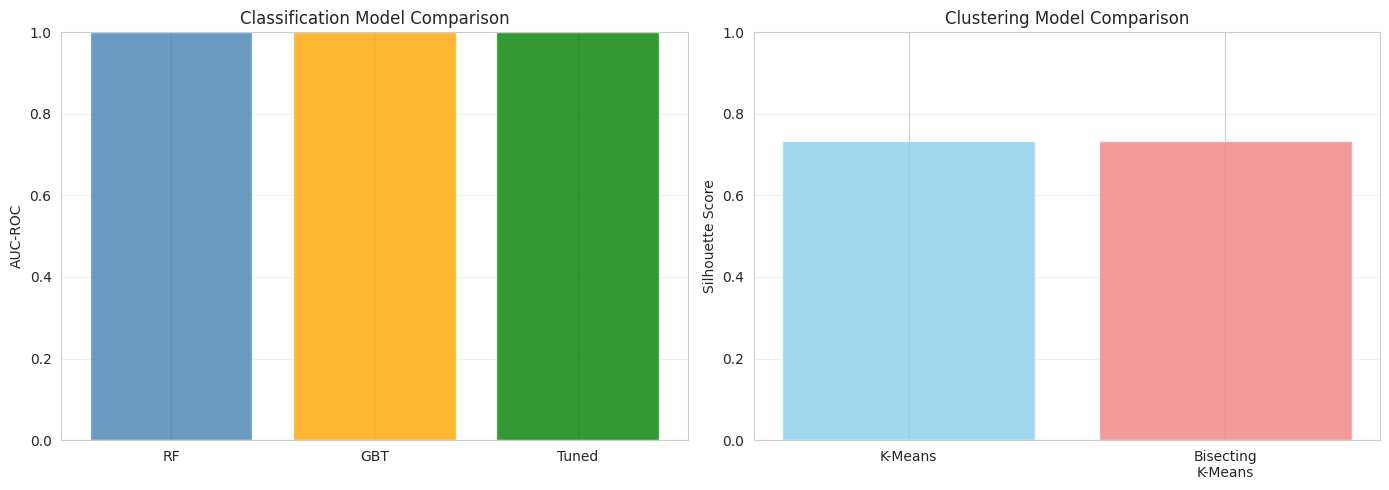

In [47]:
# Visualize Results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Classification
x = ['RF', 'GBT', 'Tuned']
auc_scores = [rf_auc, gbt_auc, tuned_auc]
axes[0].bar(x, auc_scores, color=['steelblue', 'orange', 'green'], alpha=0.8)
axes[0].set_ylabel('AUC-ROC')
axes[0].set_title('Classification Model Comparison')
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# Clustering
x2 = ['K-Means', 'Bisecting\nK-Means']
sil_scores = [km_sil, bkm_sil]
axes[1].bar(x2, sil_scores, color=['skyblue', 'lightcoral'], alpha=0.8)
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Clustering Model Comparison')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/tmp/model_comparison.png', dpi=150)
plt.show()

**Hasil Tuning GBT**, parameter terbaiknya adalah :

maxIter: 70

maxDepth: 8


**Improvement stlh Hyperparameter** : 0%, artinya tidak ada peningkatan. Hal ini dikarenakan performa model sudah sangat tinggi sejak awal

## 14. Save Models

In [48]:
# Save to HDFS
best_tuned.write().overwrite().save(f"{HDFS_PATH}models/classification")
best_cluster_model.write().overwrite().save(f"{HDFS_PATH}models/clustering")

print("Models saved to HDFS")

Models saved to HDFS


## 15. Kesimpulan

Percobaan ini menganalisis perilaku konsumen pada platform e-commerce kosmetik dengan dataset yang memenuhi kelima karakteristik Big Data 5V (Volume: 42+ juta records, Velocity: real-time event streaming, Variety: multiple event types, Veracity: data mentah dengan missing values, dan Value: insights untuk keputusan bisnis).

Proses dimulai dari penyimpanan data menggunakan HDFS (Hadoop Distributed File System), dilanjutkan dengan pemrosesan batch menggunakan MapReduce, eksplorasi data melalui EDA dengan visualisasi, preprocessing data untuk menjamin kualitas (casting tipe data, handling missing values), manipulasi data menggunakan Spark SQL dengan berbagai teknik query (CTE, subquery, agregasi), dan operasi partisi RDD menggunakan transformasi map, flatMap, serta operasi byKey (reduceByKey, groupByKey, aggregateByKey) untuk pemrosesan data terdistribusi.

Pada tahap pemodelan, dilakukan implemtasi dua pendekatan machine learning menggunakan MLLib framework: supervised learning untuk klasifikasi purchase interaction (membandingkan Random Forest dan Gradient Boosted Trees) dan unsupervised learning untuk clustering customer segments (membandingkan K-Means dan Bisecting K-Means). Kemudian dilanjutkan dengan clustering, dan Hyperparameter tuning pada best model GBT dengan parameter optimal.


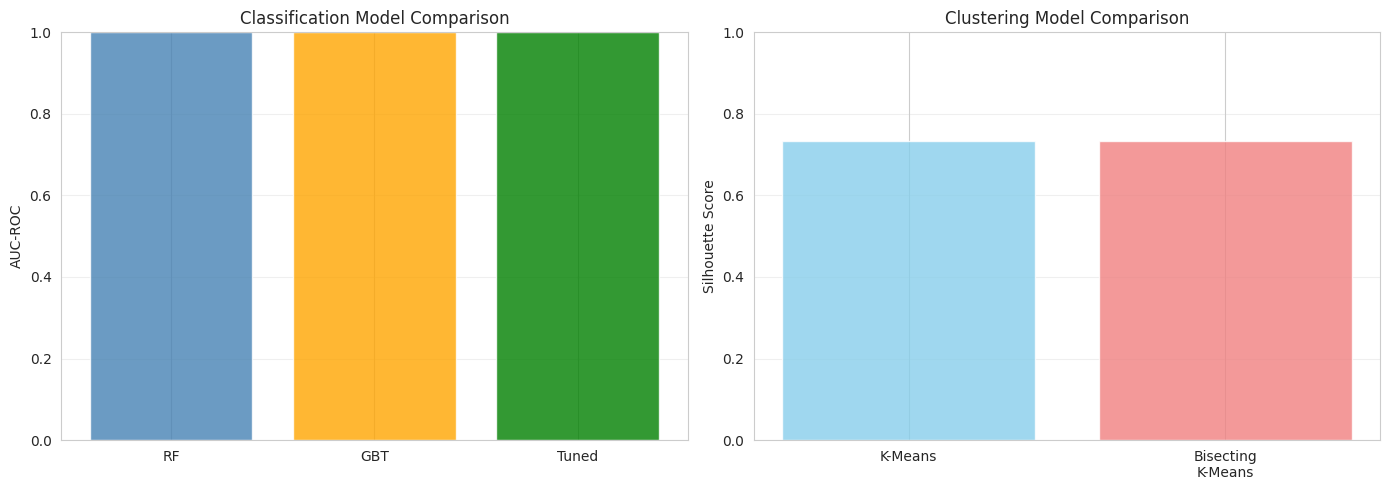